#### Lab Assignment for A-3
##### By Najeeb Fariduddin Saiyed
##### PRN - 21070126057
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

## Applying Gaussian Noise Followed By Median Filter

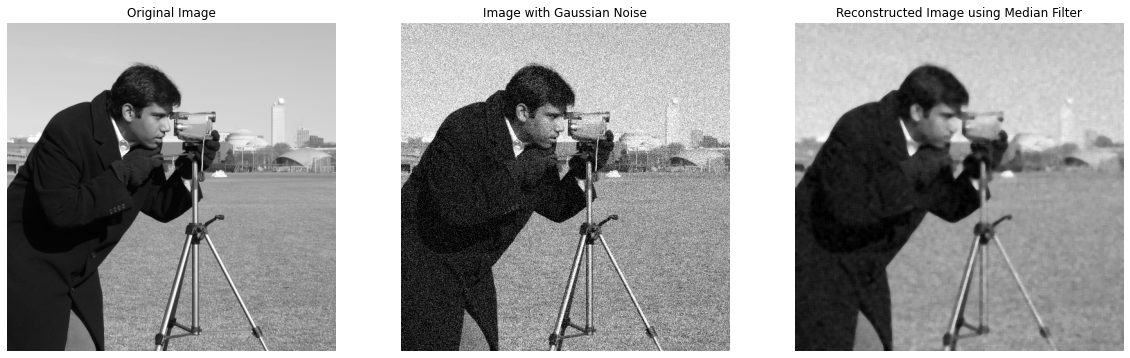

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from skimage import data, img_as_float
from skimage.util import random_noise

# Load a sample image
original_image = img_as_float(data.camera())

# Add Gaussian noise to the image
noisy_image = random_noise(original_image, mode='gaussian')

# Apply a median filter to the noisy image
reconstructed_image = median_filter(noisy_image, size=7)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Image with Gaussian Noise')
ax[1].axis('off')

ax[2].imshow(reconstructed_image, cmap='gray')
ax[2].set_title('Reconstructed Image using Median Filter')
ax[2].axis('off')

plt.show()


##### On applying the filter the image is smoothed out the graininess, but at the expense of also losing some detail. This gives the image a softer appearance, and while the noise is reduced, the image is less sharp than the original. The main forms and the action are still apparent, but finer details are less clear.

## Applying Gaussian Noise Followed By Mean Filter

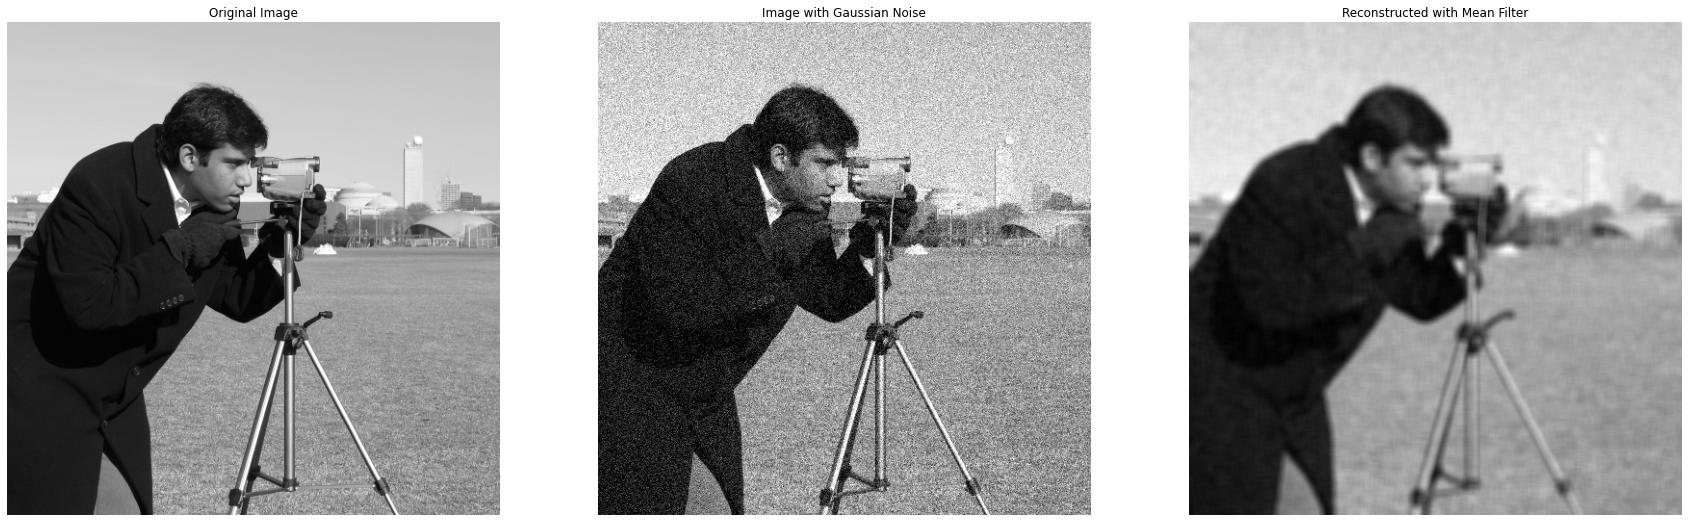

In [39]:
from scipy.ndimage import uniform_filter

# Apply a mean filter to the noisy image
mean_filtered_image = uniform_filter(noisy_image, size=9)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Image with Gaussian Noise')
ax[1].axis('off')

ax[2].imshow(mean_filtered_image, cmap='gray')
ax[2].set_title('Reconstructed with Mean Filter')
ax[2].axis('off')

plt.show()


##### on applying the mean filter we see a further degraded version of the noisy image because now noise and blur are present a lot. This degradation severely affects the image's clarity, to the point where details are much harder to distinguish. The subject and their actions are still identifiable due to the maintained overall shape and composition, but the finer details of the subject's features and the background are largely lost.

## Applying Gaussian Noise Followed By Geometric Mean Filter

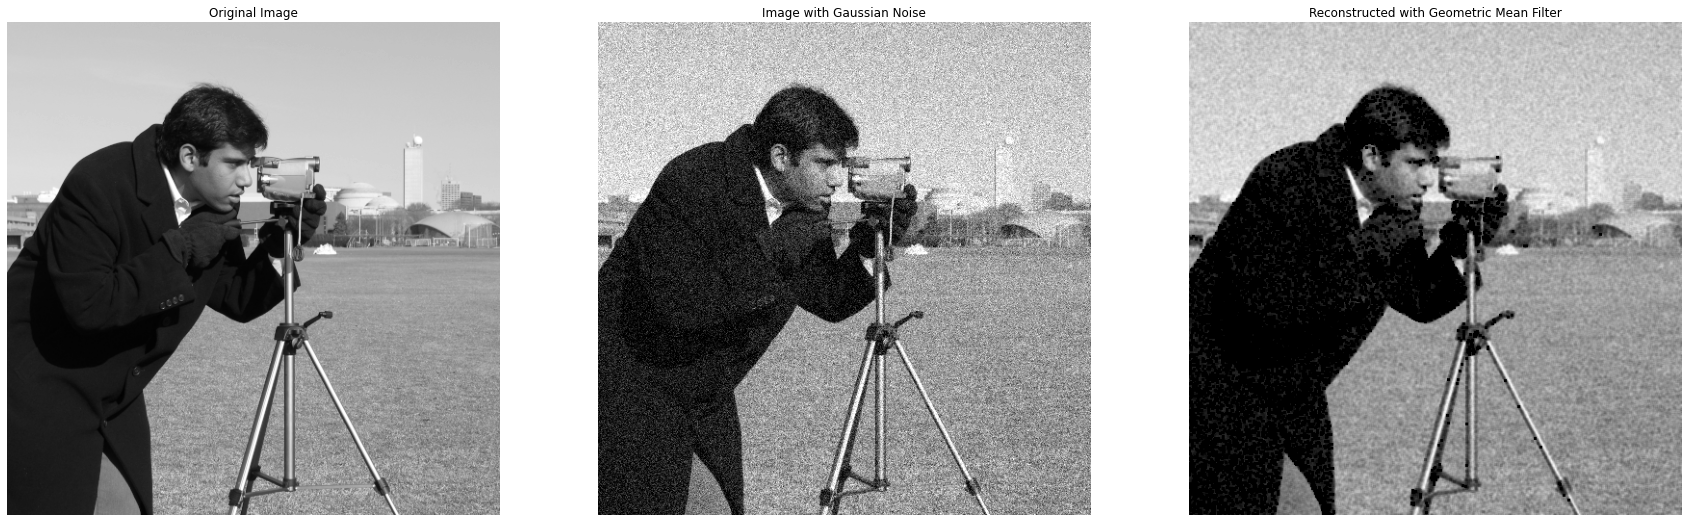

In [44]:
from scipy.ndimage import generic_filter
import numpy as np

def geometric_mean(arr):
    """Calculate the geometric mean of the array elements."""
    product = np.prod(arr)
    n = arr.size
    return product**(1/n)

# Apply a geometric mean filter to the noisy image
geometric_filtered_image = generic_filter(noisy_image, geometric_mean, size=3)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Image with Gaussian Noise')
ax[1].axis('off')


ax[2].imshow(geometric_filtered_image, cmap='gray')
ax[2].set_title('Reconstructed with Geometric Mean Filter')
ax[2].axis('off')

plt.show()


 the noise is even more pronounced after applying the geometrical mean filter
 , and it seems that a filtering technique has been applied to try to mitigate the noise.
The filter appears to have smoothed out some of the graininess, resulting in a loss of sharpness and detail.
The individual's features and the details of the tripod and device are now quite blurred, making specific identification challenging.
The background is now more obscure, with the structures blending into the noisy backdrop.

## Applying Gaussian Noise Followed By Harmonic Mean Filter

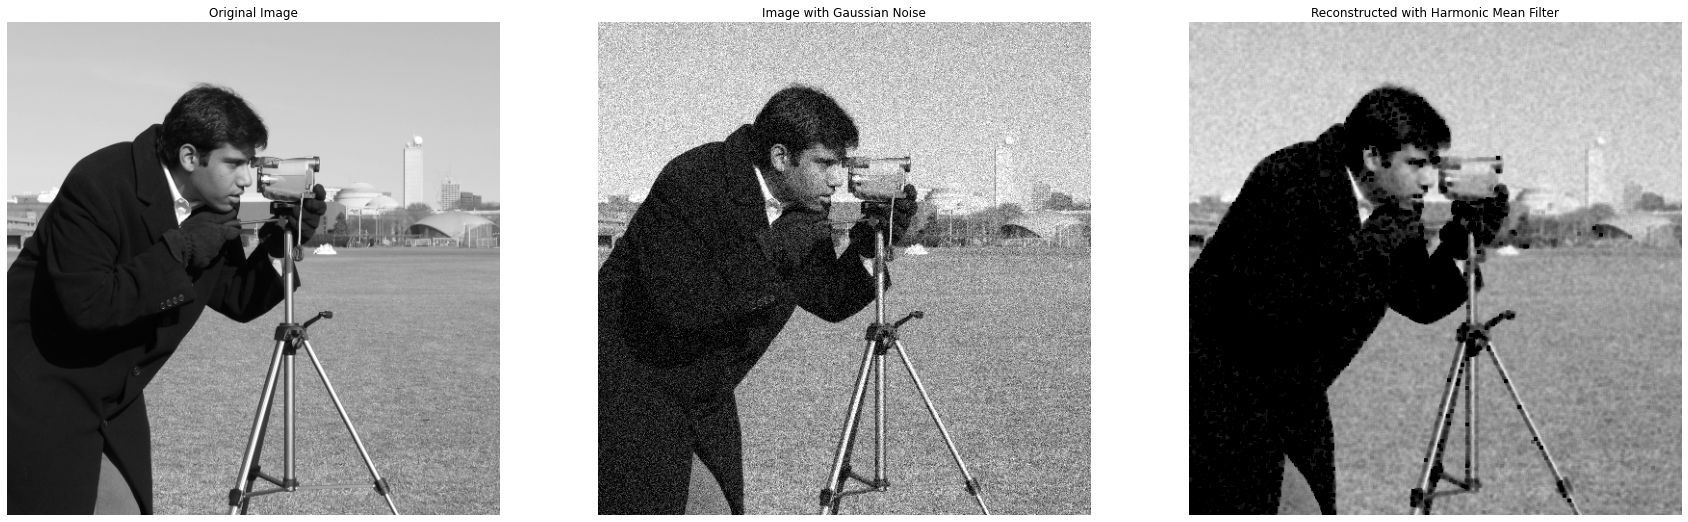

In [49]:
def harmonic_mean(arr):
    """Calculate the harmonic mean of the array elements."""
    # Avoid division by zero
    arr[arr == 0] = np.finfo(float).eps
    return arr.size / np.sum(1.0 / arr)

# Apply a harmonic mean filter to the noisy image
harmonic_filtered_image = generic_filter(noisy_image, harmonic_mean, size=4)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Image with Gaussian Noise')
ax[1].axis('off')


ax[2].imshow(harmonic_filtered_image, cmap='gray')
ax[2].set_title('Reconstructed with Harmonic Mean Filter')
ax[2].axis('off')

plt.show()


#### Here the filter tries to remove the noise has resulted in a loss of sharpness and detail, resulting in a softer and blurrier appearance. While the noise is less pronounced, the filtering process has compromised the clarity of the image, making it difficult to discern specific details of both the subject and the background. but unlikegeometric mean filterit has removed textures from the image also

## Applying Salt & Pepper Noise Followed By Median Filter

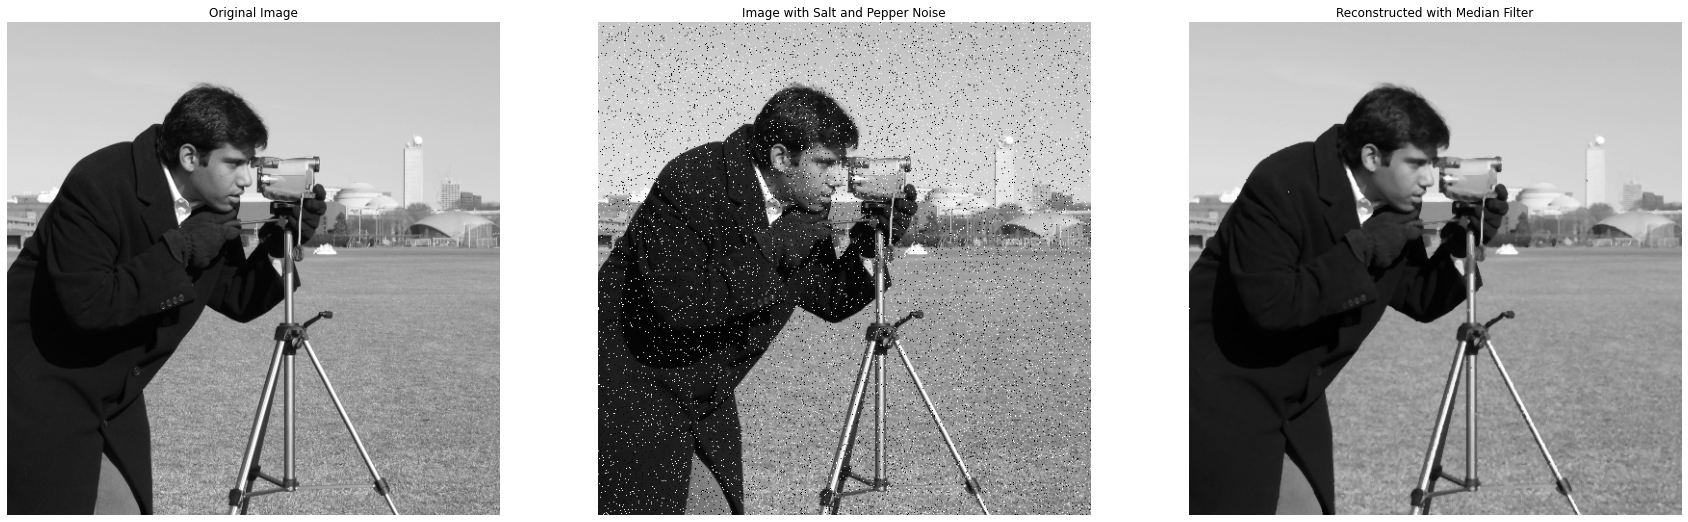

In [51]:
# Add salt-and-pepper noise to the original image
salt_and_pepper_noisy_image = random_noise(original_image, mode='s&p', amount=0.05)

# Apply a median filter to the salt-and-pepper noisy image
median_filtered_sp_image = median_filter(salt_and_pepper_noisy_image, size=3)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(salt_and_pepper_noisy_image, cmap='gray')
ax[1].set_title('Image with Salt and Pepper Noise')
ax[1].axis('off')

ax[2].imshow(median_filtered_sp_image, cmap='gray')
ax[2].set_title('Reconstructed with Median Filter')
ax[2].axis('off')

plt.show()


####  We get a really well constructed image after applying median fitler, suggesting median filter performs the best when it comes to salt and pepper noise

## Applying Salt & Pepper Noise Followed By Mean Filter

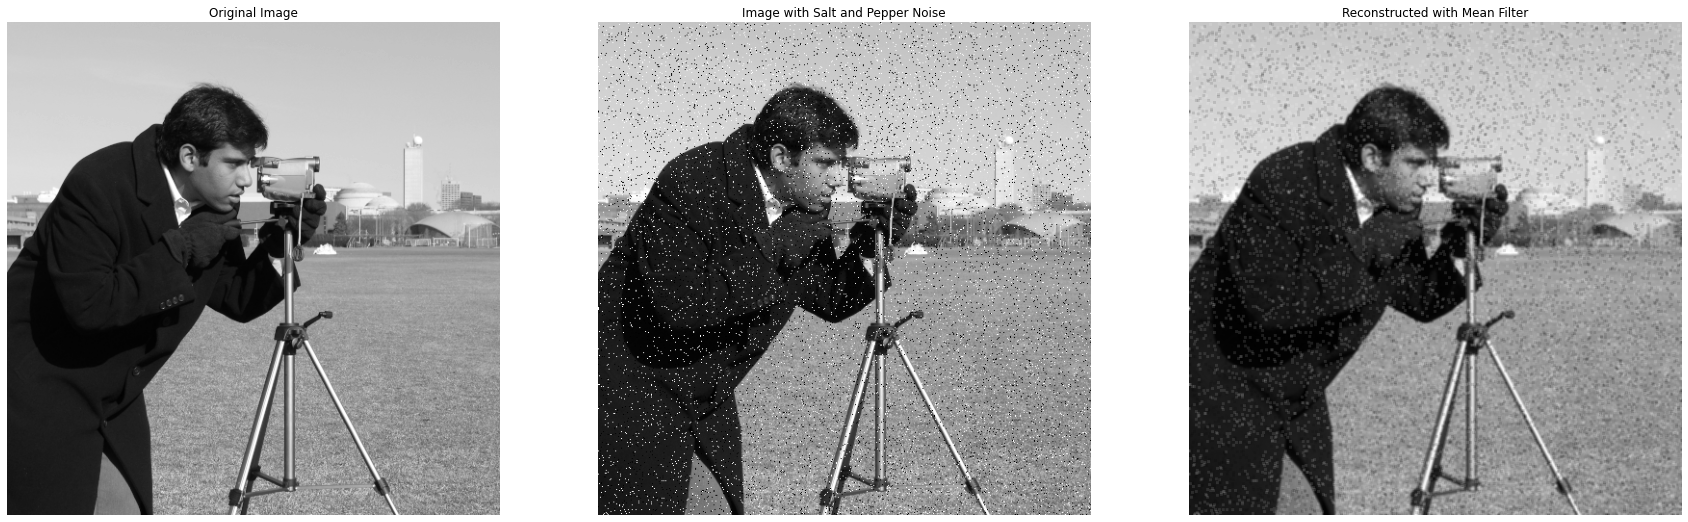

In [55]:
# Apply a mean filter to the salt-and-pepper noisy image
mean_filtered_sp_image = uniform_filter(salt_and_pepper_noisy_image, size=3)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(salt_and_pepper_noisy_image, cmap='gray')
ax[1].set_title('Image with Salt and Pepper Noise')
ax[1].axis('off')

ax[2].imshow(mean_filtered_sp_image, cmap='gray')
ax[2].set_title('Reconstructed with Mean Filter')
ax[2].axis('off')

plt.show()


#### We see overall the salt and pepper nosie has been blurred our and it has tried to mitigate most of the noise from the image, we also notice a blur has been added as a consequence.

## Applying Salt & Pepper Noise Followed By Geometric Filter

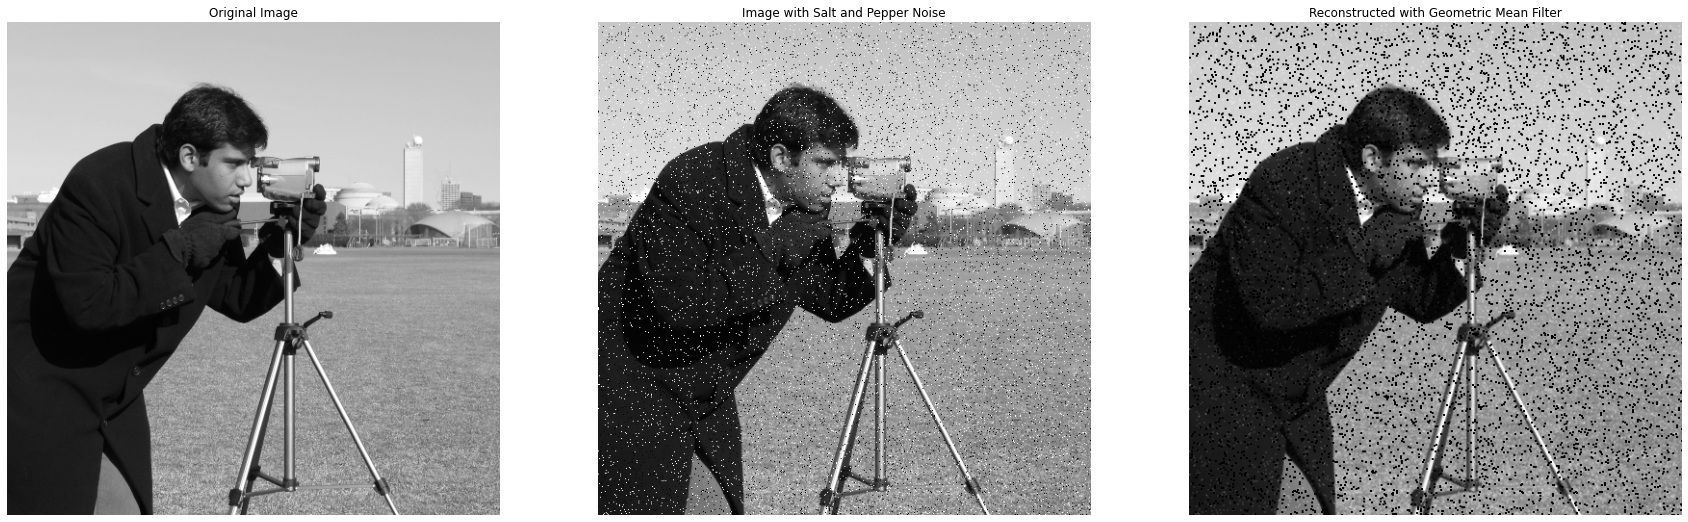

In [58]:
# Apply a geometric mean filter to the salt-and-pepper noisy image
geometric_filtered_sp_image = generic_filter(salt_and_pepper_noisy_image, geometric_mean, size=2)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(salt_and_pepper_noisy_image, cmap='gray')
ax[1].set_title('Image with Salt and Pepper Noise')
ax[1].axis('off')

ax[2].imshow(geometric_filtered_sp_image, cmap='gray')
ax[2].set_title('Reconstructed with Geometric Mean Filter')
ax[2].axis('off')


plt.show()


### from the image we notice the noise level is further increased, resulting in an even more obscured image. on applying the filter rather than smoothing out the noise effectively, it seems to have created a more muddled and less coherent visual. thus the geometric mean filter may have been too aggressive or not well-suited to the type of noise present,

## Applying Salt & Pepper Noise Followed By Harmonic Mean Filter

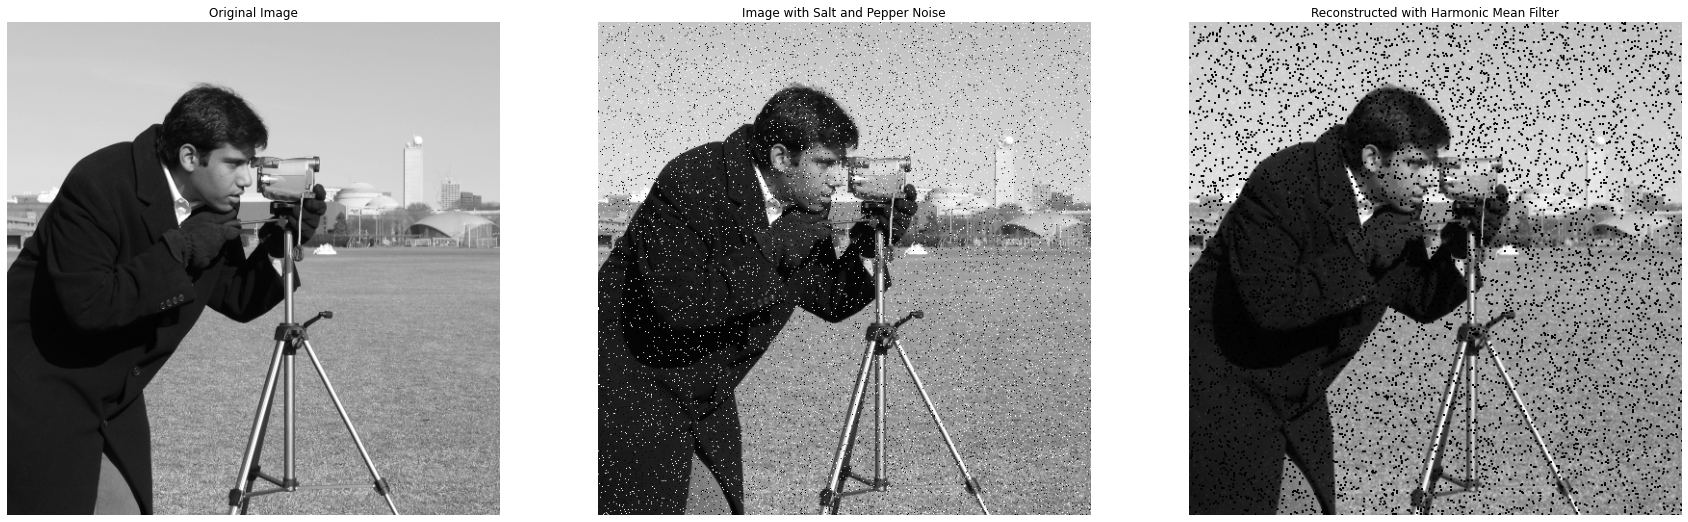

In [60]:
# Apply a harmonic mean filter to the salt-and-pepper noisy image
harmonic_filtered_sp_image = generic_filter(salt_and_pepper_noisy_image, harmonic_mean, size=2)

# Plotting the images for comparison
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(salt_and_pepper_noisy_image, cmap='gray')
ax[1].set_title('Image with Salt and Pepper Noise')
ax[1].axis('off')

ax[2].imshow(harmonic_filtered_sp_image, cmap='gray')
ax[2].set_title('Reconstructed with Harmonic Mean Filter')
ax[2].axis('off')


plt.show()


#### Here we see the Harmonic Mean filter performs as equally bad as geometric mean filter when it comes to salt and pepper noise
